In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('1.04.+Real-life+example.csv')

In [71]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [43]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


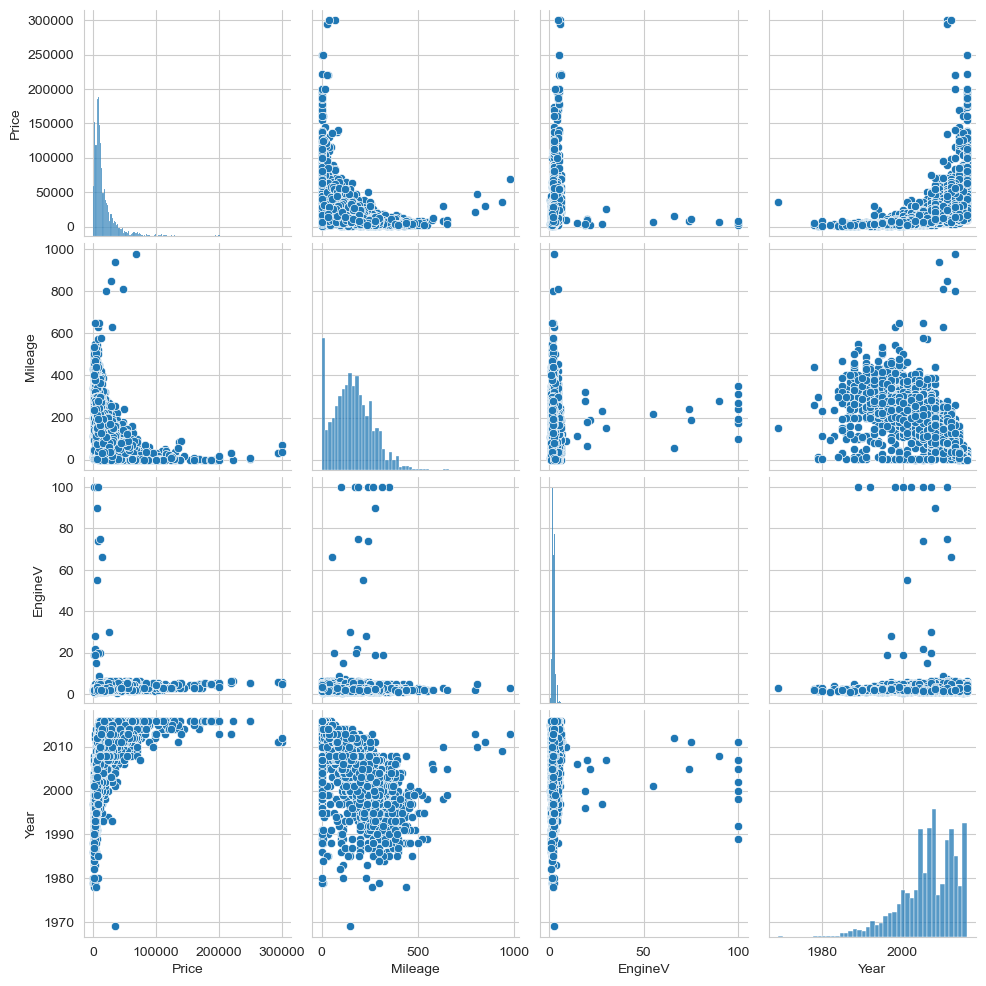

In [44]:
sns.pairplot(df)

In [4]:
df.drop(['Model'],axis=1,inplace=True) #too many categories 
#not useful

In [5]:
df.dropna(inplace=True)

In [47]:
df.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


<Axes: xlabel='Price', ylabel='Count'>

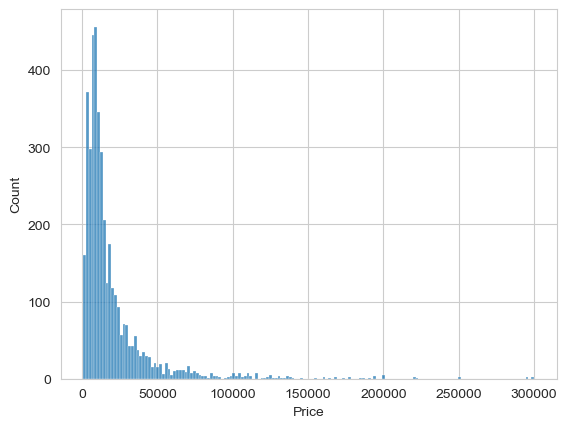

In [48]:
sns.histplot(df['Price']) #some very high priced outliers

<Axes: xlabel='Year', ylabel='Count'>

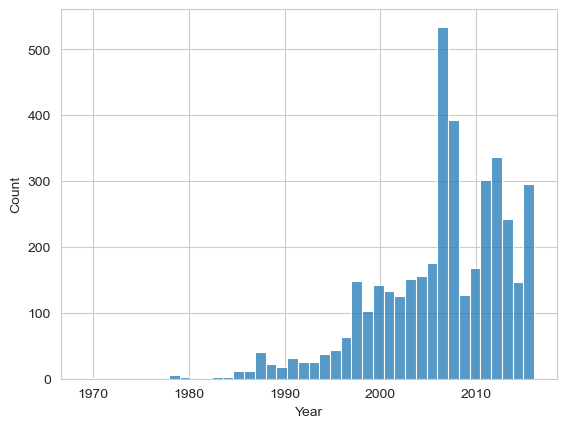

In [49]:
sns.histplot(df['Year']) #some vintage car outliers

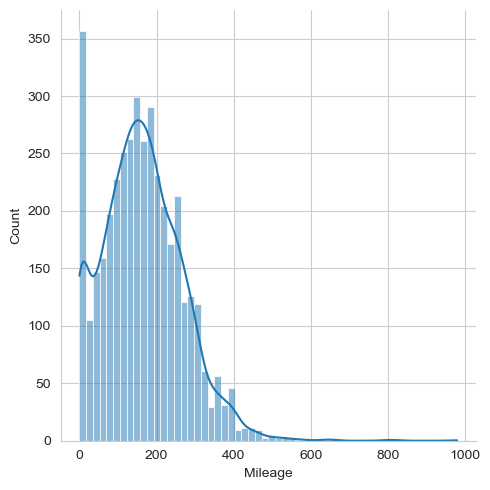

In [50]:
sns.displot(df['Mileage'],kde=True)

<Axes: xlabel='EngineV', ylabel='Count'>

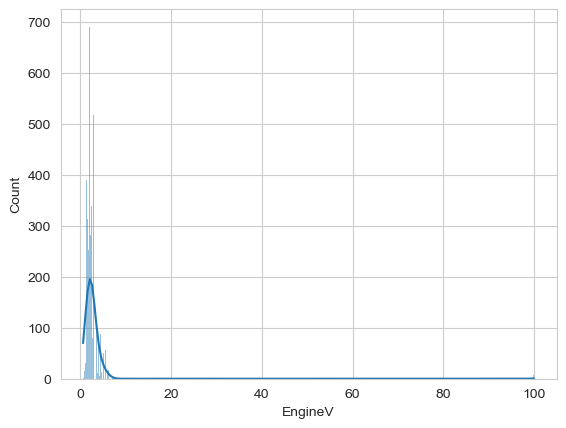

In [65]:
sns.histplot(x='EngineV',data=df,kde=True) #some wrong data for engine volume volume must be under 10

In [6]:
df=df[df['EngineV']<10]

In [7]:
df=df[df['Price']<df['Price'].quantile(0.99)]

In [78]:
df.describe()

,Price,Mileage,EngineV,Year
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,16888.830092,166.566071,2.434168,2006.212245
std,16358.387518,102.125134,0.942994,6.640889
min,600.000000,0.000000,0.600000,1969.000000
25%,6950.000000,95.000000,1.800000,2002.000000
50%,11300.000000,160.000000,2.200000,2007.000000
75%,20869.362500,230.000000,3.000000,2011.000000
max,103333.000000,980.000000,6.300000,2016.000000


In [8]:
df['Log_price']=df['Price'].apply(np.log) # log trainsformation

In [9]:
df.drop(['Price'],axis=1,inplace=True) 

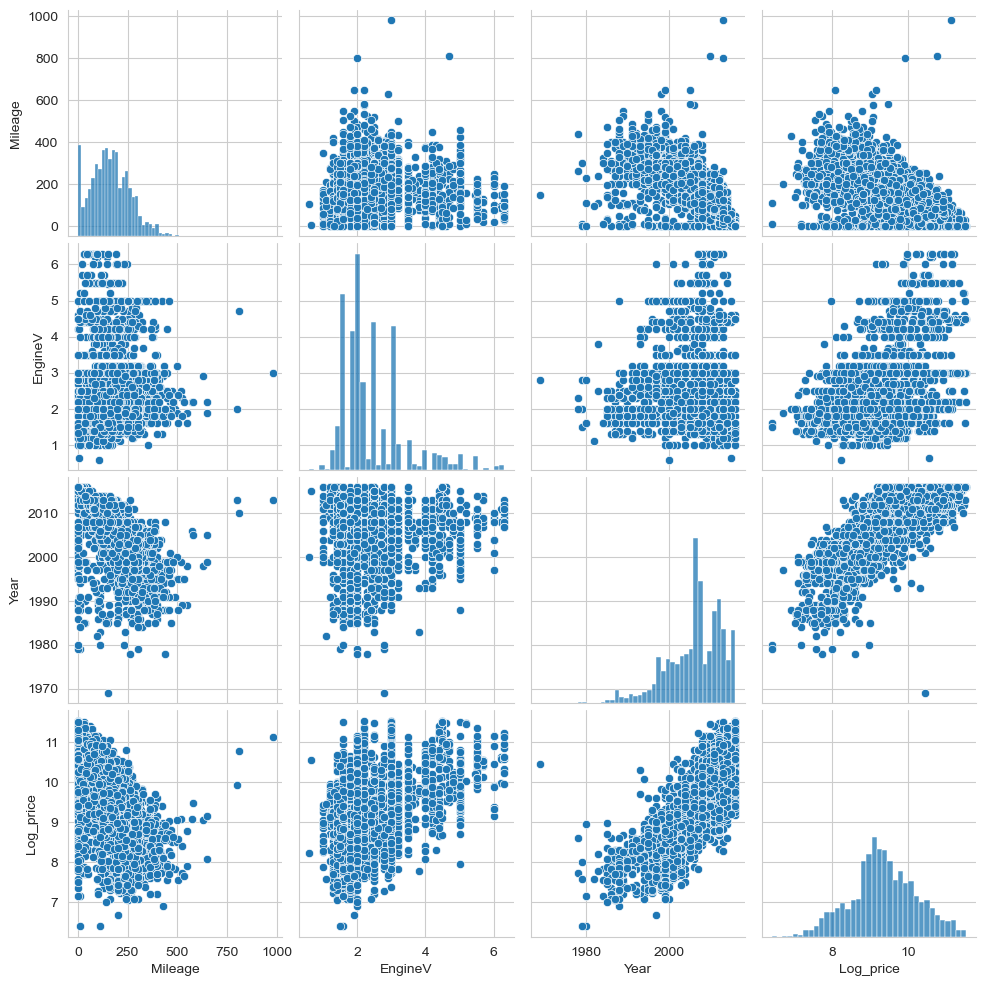

In [82]:
sns.pairplot(df)

In [10]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Log_price'],
      dtype='object')

In [11]:
vif=pd.DataFrame([variance_inflation_factor(df[['Mileage','Year','EngineV']].values, i) for i in range(df[['Mileage','Year','EngineV']].shape[1])])

In [12]:
vif['features']=['Mileage','Year','EngineV']

In [13]:
vif

,0,features
0,3.548011,Mileage
1,10.076701,Year
2,7.565480,EngineV


In [14]:
#as variable year is very dependent we drop it
df.drop(['Year'],axis=1,inplace=True)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
X=df.drop(["Log_price"],axis=1)
y=df['Log_price']

In [18]:
standardiser=StandardScaler()
standardiser.fit(X)
X=pd.DataFrame(standardiser.transform(X),columns=X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)

In [36]:
model=LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

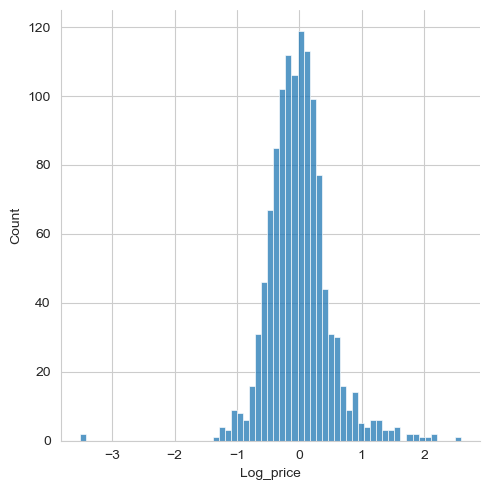

In [37]:
sns.displot(prediction-y_test)

<Axes: xlabel='Log_price'>

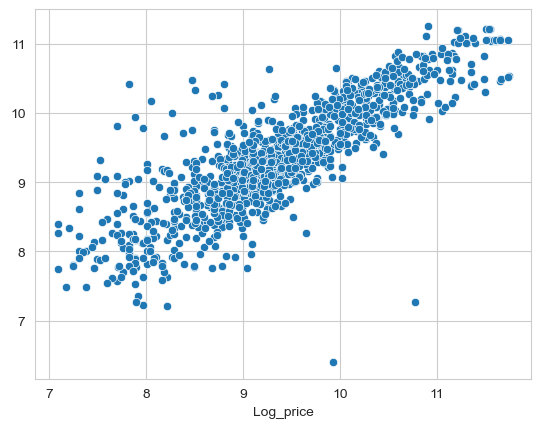

In [38]:
sns.scatterplot(y=prediction,x=y_test)

In [39]:

stats=sm.OLS(np.array(y_test).reshape(-1,1),sm.add_constant(X_test)).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.43e-305
Time:                        14:46:09   Log-Likelihood:                -822.78
No. Observations:                1190   AIC:                             1682.
Df Residuals:                    1172   BIC:                             1773.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3968      0.014    662.964      0.000       9.369       9.425
Mileage                -0.4067      0.015    -27.086      0.000      -0.436      -0.377
EngineV                 0.2162      0.018     11.730      0.000       0.180       0.252
Brand_BMW               0.0146      0.021      0.692      0.489      -0.027       0.056
Brand_Mercedes-Benz     0.0175      0.023      0.773      0.440      -0.027       0.062
Brand_Mitsubishi       -0.1323      0.019     -6.984      0.000      -0.169      -0.095
Brand_Renault          -0.1720      0.021     -8.315      0.000      -0.213      -0.131
Brand_Toyota           -0.0320      0.021     -1.532      0.126      -0.073       0.009
Brand_Volkswagen       -0.0856      0.023     -3.716      0.000      -0.131      -0.040
Body_hatch             -0.1696      0.018     -9.342      0.000      -0.205      -0.134
Body_other             -0.1223      0.017     -7.099      0.000      -0.156      -0.088
Body_sedan             -0.2274      0.022    -10.360      0.000      -0.270      -0.184
Body_vagon             -0.1536      0.018     -8.462      0.000      -0.189      -0.118
Body_van               -0.2081      0.021     -9.885      0.000      -0.249      -0.167
Engine Type_Gas        -0.1444      0.017     -8.430      0.000      -0.178      -0.111
Engine Type_Other      -0.0386      0.014     -2.710      0.007      -0.067      -0.011
Engine Type_Petrol     -0.1675      0.017     -9.578      0.000      -0.202      -0.133
Registration_yes        0.3308      0.015     22.756      0.000       0.302       0.359
==============================================================================
Omnibus:                      153.328   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1215.514
Skew:                          -0.296   Prob(JB):                    1.13e-264
Kurtosis:                       7.916   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
sklearn.metrics.mean_absolute_error(y_test,prediction)

0.34723107267273146

In [41]:
sklearn.metrics.mean_squared_error(y_test,prediction)

0.23774325680291883

In [42]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction))

0.48758922958051365

In [43]:
predictions_prices=np.exp(prediction)

In [44]:
predictions_prices

array([31396.04456073, 12256.33812288,  5654.48381366, ...,
        5084.42597523, 11007.67268299,  8554.35582814])

In [45]:
y_test_prices=np.exp(y_test)

In [50]:
model.score(X_test,y_test)

0.7101829566589912

In [51]:
adjustedr2=1-((1-0.6771869519766327)*(1175)/(1175-17))

In [52]:
adjustedr2

0.6724479003217128